In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import math
import os
import scipy.interpolate, scipy.optimize
import numpy as np
import soundfile as sf
import time
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

## filter

In [7]:
frequency_band = [x for x in range(500,8500,500)]

In [8]:
# order = 10
rawnet1dense = [36.1400 , 32.6300, 27.0800, 19.6400, 17.9900, 14.5300, 11.5400, 12.1000, 14.5000, 19.7500, 24.5900, 25.0800, 30.6500, 9.6300, 6.2900 , 5.65]
wavlm3dense = [24.750000000000007, 16.54, 14.34, 11.97, 10.419999999999996, 9.360000000000001, 8.14, 7.580000000000001, 6.87, 6.660000000000001, 6.5, 6.399999999999995, 6.21, 5.99, 5.9200000000000035, 5.85]

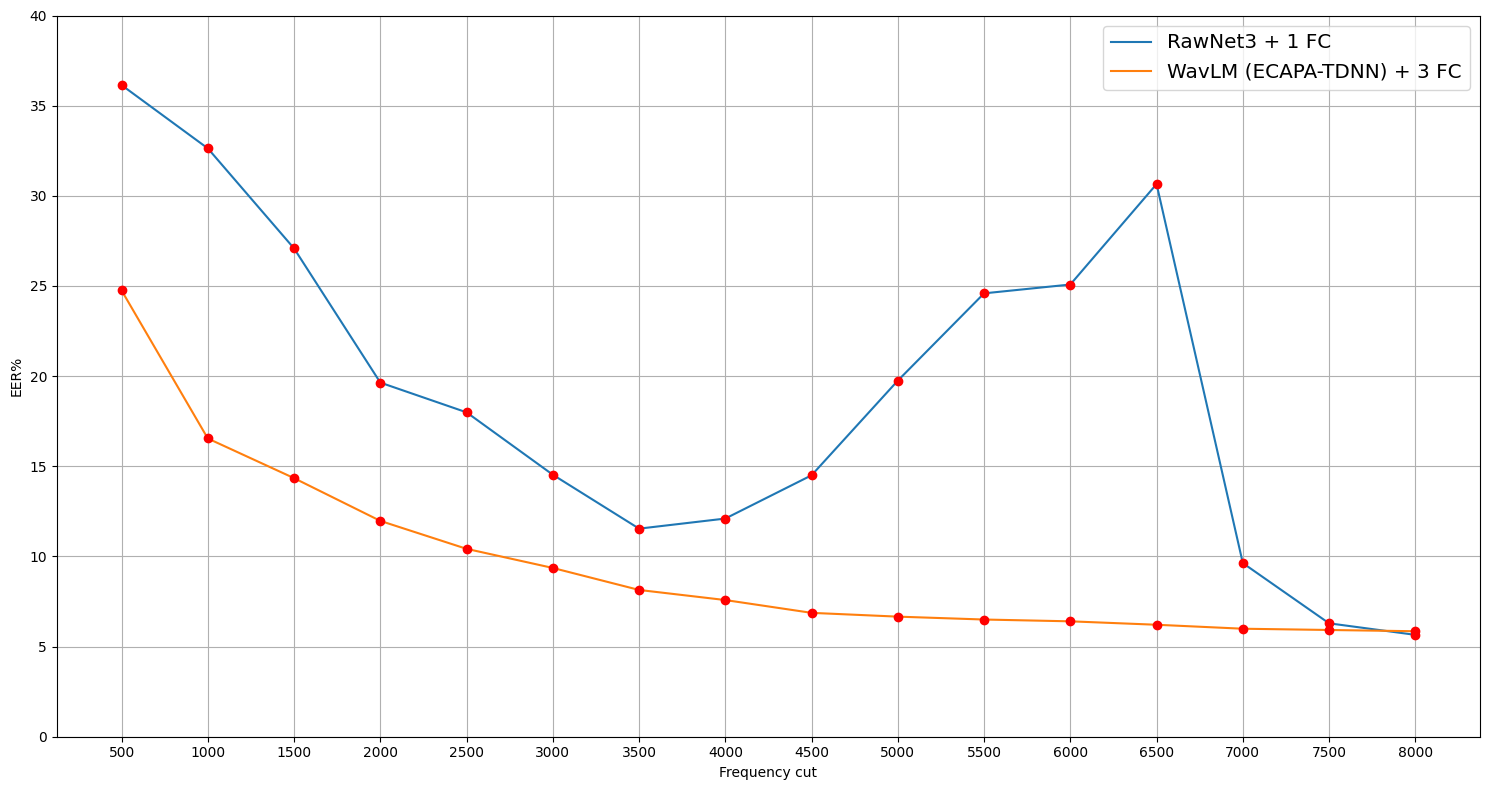

In [9]:

fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.grid(True)

ax.plot(frequency_band, rawnet1dense, label="RawNet3 + 1 FC")
ax.plot(frequency_band, rawnet1dense, 'ro')

ax.plot(frequency_band, wavlm3dense, label="WavLM (ECAPA-TDNN) + 3 FC")
ax.plot(frequency_band, wavlm3dense, 'ro')

plt.xticks(frequency_band, frequency_band)
legend = ax.legend( fontsize='x-large')
legend.get_frame()
plt.xlabel('Frequency cut')
plt.ylabel('EER%')
plt.ylim(0,40)
plt.tight_layout()
plt.savefig(f'/content/filter_dense.png')
plt.show()

## noise

In [13]:
# order = 10
rawnetfinetune =[18.0900 , 16.5100 ,15.8800 , 14.7800 ,13.9900 ,13.4100 ,12.4400 ,11.9000 ,11.4500 ,10.4300 ,9.7400 ,9.2300 ,8.8400 ,7.9400 ,7.4900 ,7.0200  ]
wavlmfinetune = [12.740000000000002,
 10.59,
 9.330000000000005,
 8.77,
 7.299999999999995,
 6.859999999999999,
6.440000000000001,
 5.9300000000000015,
 5.19,
 4.810000000000003,
 4.630000000000001,
 4.45,
 4.190000000000005,
 4.0000000000000036,
 3.9100000000000024,
 3.720000000000001]

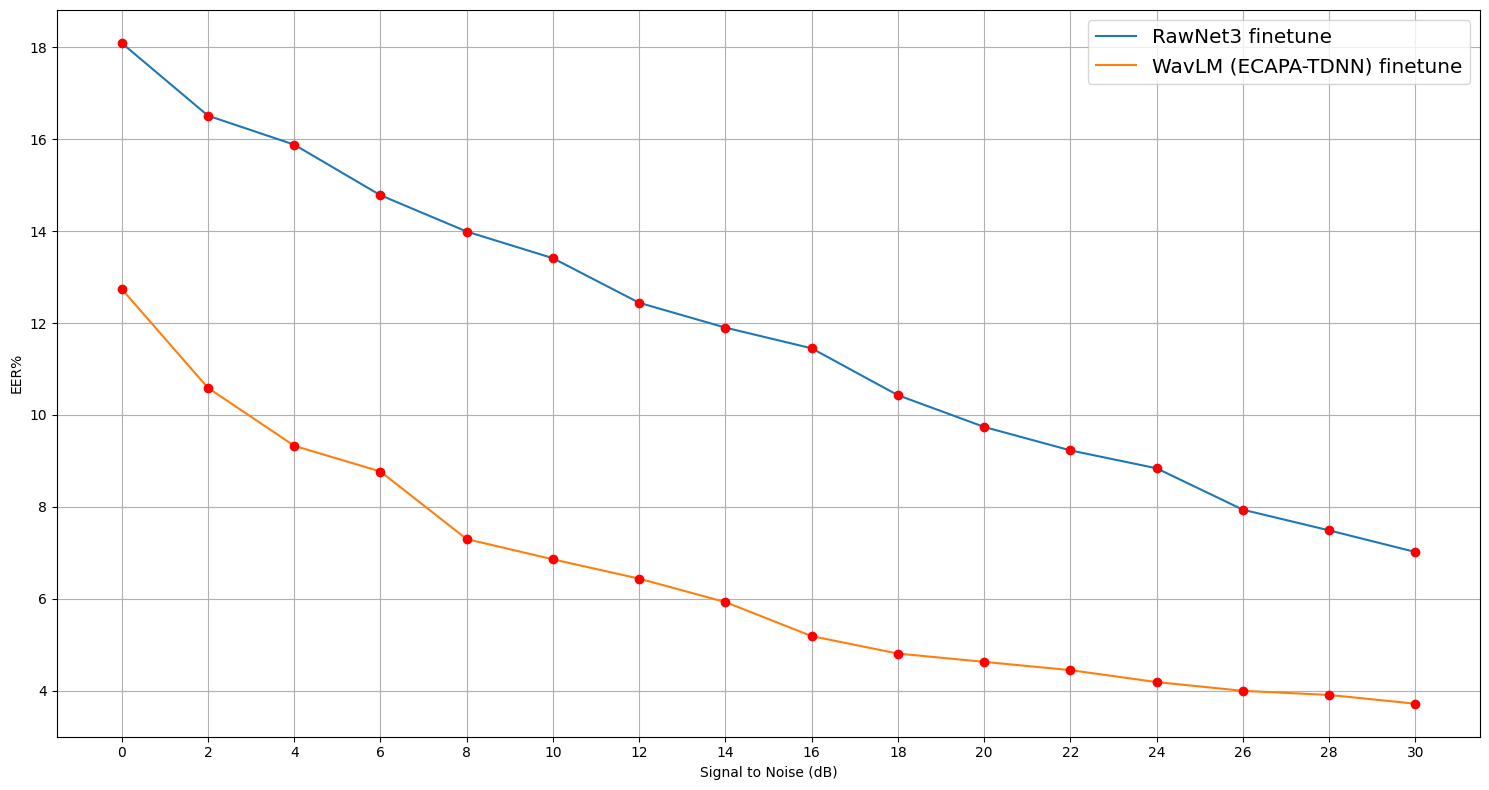

In [14]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.grid(True)
snr = [x for x in range(0,32,2)]

ax.plot(snr, rawnetfinetune, label="RawNet3 finetune")
ax.plot(snr, rawnetfinetune, 'ro')


ax.plot(snr, wavlmfinetune, label="WavLM (ECAPA-TDNN) finetune")
ax.plot(snr, wavlmfinetune, 'ro')

plt.xticks(snr, snr)

legend = ax.legend( fontsize='x-large')
legend.get_frame()

plt.xlabel('Signal to Noise (dB)')
plt.ylabel('EER%')
# plt.ylim(ylimit)
plt.tight_layout()
plt.savefig(f'/content/noise_finetune.png')
plt.show()

---